# Nomination graph

In [32]:
import { GearApi } from "https://gear-js.deno.dev/api/index.ts"
import { graphviz } from "npm:node-graphviz"
import { display, html, svg } from "https://deno.land/x/display/mod.ts"
import { BN, formatBalance } from 'https://deno.land/x/polkadot/util/mod.ts';

const api = await GearApi.create({
    providerAddress: "wss://rpc.vara-network.io",
    noInitWarn: true,
})

formatBalance.setDefaults({ unit: 'VARA' });

function toUnit(balance) {
    let decimals = api.registry.chainDecimals[0];
    let base = new BN(10).pow(new BN(decimals));
    let dm = api.createType("Balance", balance.replaceAll(",", "")).divmod(base);
    return parseFloat(dm.div.toString() + "." + dm.mod.toString())
}

function toMUnit(balance) {
    let decimals = api.registry.chainDecimals[0];
    let base = new BN(10).pow(new BN(decimals+6));
    let dm = api.createType("Balance", balance.replaceAll(",", "")).divmod(base);
    return parseFloat(dm.div.toString() + "." + dm.mod.toString())
}

function varaBalance(balance) {
    return formatBalance(
        toUnit(balance),
        { withSi: true },
        12
    );
}

function generateDotFile(data: any[]) {
  let dotFile = `digraph G {
  rankdir=RL;
  # node [shape="box"];
  oneblock=true;
`;

  data.forEach((validator, index) => {
    const validatorId = validator.validator;
    const own = varaBalance(validator.own);
    
    dotFile += ` subgraph "${validatorId}" {\n`

    dotFile += `  { node [shape="box"]; "${validatorId}"; }\n`
    dotFile += `  "${validatorId}" -> "${validatorId}" [label="${own}"];\n`;

    validator.others.forEach((nominator, nominatorIndex) => {
      // const nomineeLabel = `Nominee ${nomineeIndex + 1}`;
      const nominatorId = nominator.who;
      const nominatorValue = varaBalance(nominator.value);
      dotFile += `  "${nominatorId}" -> "${validatorId}" [label="${nominatorValue}",labeldistance=12];\n`;
    });

    dotFile += ` }\n`
  });

  dotFile += `}`;

  return dotFile;
}

In [9]:
api.isConnected

true

In [10]:
let info = await api.derive.staking.electedInfo();

In [11]:
info.info[0].exposure.toHuman()

{
  total: "22,851,190,196,054,411,406",
  own: "100,546,372,875,957,966",
  others: [
    {
      who: "kGm4tpLSCy2PKtLLyiFkkDv6T2o7bF5bnmXyezxNZbm2TJynm",
      value: "31,999,999,999,510"
    },
    {
      who: "kGkXshf4tKBCc6PMCvQb35XQAkYkbLT3yGeCaDtMZ54TxPShJ",
      value: "22,750,611,823,178,453,930"
    }
  ]
}

In [12]:
console.table(info.info.map((x)=>{return {
    address: x.stashId.toHuman(), 
    totalExposure: varaBalance(x.exposure.toHuman().total), 
    own: varaBalance(x.exposure.toHuman().own),
}}))

┌───────┬─────────────────────────────────────────────────────┬─────────────────┬──────────────────┐
│ (idx) │ address                                             │ totalExposure   │ own              │
├───────┼─────────────────────────────────────────────────────┼─────────────────┼──────────────────┤
│     0 │ "kGhoEmnqc2xaDXLMEQJXbawmLUYc9YWo8C7CVrpi7Y9DfEMUb" │ "22.8511 MVARA" │ "100.5460 kVARA" │
│     1 │ "kGhzuQArdAJrzYh2KXznA5mvbzDR1ND7mtzp6wjXc41C1ozEw" │ "47.0000 MVARA" │ "100.0000 kVARA" │
│     2 │ "kGkhHieZ4HvtQmy5vn9CqPY4tzDqTQBJ2JUWpSAStviCPiYDc" │ "42.6429 MVARA" │ "99.9990 kVARA"  │
│     3 │ "kGifrGo7tfEteZVpFnwhjK2pQQ4W5oTMmuLXP5FqsBdzGAGkt" │ "40.0334 MVARA" │ "100.0890 kVARA" │
│     4 │ "kGimAUPGxseHxBSYC28zDNuvwoTcThmMmQhaoRaQ5eAgy5qan" │ "42.6633 MVARA" │ "100.0890 kVARA" │
│     5 │ "kGi7gJB7DBResFi3byPRrhFKNAQSRg3ngWED92hki2VT2RvPA" │ "90.6326 MVARA" │ "100.0090 kVARA" │
│     6 │ "kGhxBx6wT8TuTTp7Kq5Vo6YgG2GeWqqGMAvYQ1iezngp542F7" │ "40.0254 MVARA" │ "99.9990 

In [13]:
let data = info.info.map(
        (x)=>{
            return {
                validator: x.stashId.toHuman(),
                ...x.exposure.toHuman()
            }
        }
    )

{"code":-32000,"message":"Promise was collected"}:  

In [14]:
data[0]

{
  validator: "kGhoEmnqc2xaDXLMEQJXbawmLUYc9YWo8C7CVrpi7Y9DfEMUb",
  total: "22,851,190,196,054,411,406",
  own: "100,546,372,875,957,966",
  others: [
    {
      who: "kGm4tpLSCy2PKtLLyiFkkDv6T2o7bF5bnmXyezxNZbm2TJynm",
      value: "31,999,999,999,510"
    },
    {
      who: "kGkXshf4tKBCc6PMCvQb35XQAkYkbLT3yGeCaDtMZ54TxPShJ",
      value: "22,750,611,823,178,453,930"
    }
  ]
}

In [15]:

const dotGraph = generateDotFile(data);
console.log(dotGraph);


digraph G {
  rankdir=RL;
  # node [shape="box"];
  oneblock=true;
 subgraph "kGhoEmnqc2xaDXLMEQJXbawmLUYc9YWo8C7CVrpi7Y9DfEMUb" {
  { node [shape="box"]; "kGhoEmnqc2xaDXLMEQJXbawmLUYc9YWo8C7CVrpi7Y9DfEMUb"; }
  "kGhoEmnqc2xaDXLMEQJXbawmLUYc9YWo8C7CVrpi7Y9DfEMUb" -> "kGhoEmnqc2xaDXLMEQJXbawmLUYc9YWo8C7CVrpi7Y9DfEMUb" [label="100.5460 kVARA"];
  "kGm4tpLSCy2PKtLLyiFkkDv6T2o7bF5bnmXyezxNZbm2TJynm" -> "kGhoEmnqc2xaDXLMEQJXbawmLUYc9YWo8C7CVrpi7Y9DfEMUb" [label="31.0000 VARA",labeldistance=12];
  "kGkXshf4tKBCc6PMCvQb35XQAkYkbLT3yGeCaDtMZ54TxPShJ" -> "kGhoEmnqc2xaDXLMEQJXbawmLUYc9YWo8C7CVrpi7Y9DfEMUb" [label="22.7506 MVARA",labeldistance=12];
 }
 subgraph "kGhzuQArdAJrzYh2KXznA5mvbzDR1ND7mtzp6wjXc41C1ozEw" {
  { node [shape="box"]; "kGhzuQArdAJrzYh2KXznA5mvbzDR1ND7mtzp6wjXc41C1ozEw"; }
  "kGhzuQArdAJrzYh2KXznA5mvbzDR1ND7mtzp6wjXc41C1ozEw" -> "kGhzuQArdAJrzYh2KXznA5mvbzDR1ND7mtzp6wjXc41C1ozEw" [label="100.0000 kVARA"];
  "kGiV1p3TD9PzDCEQZHMRmdACTZRHAVbrE1Ftws4RAca7WTsWz" -> "kGhzuQArdAJrzYh

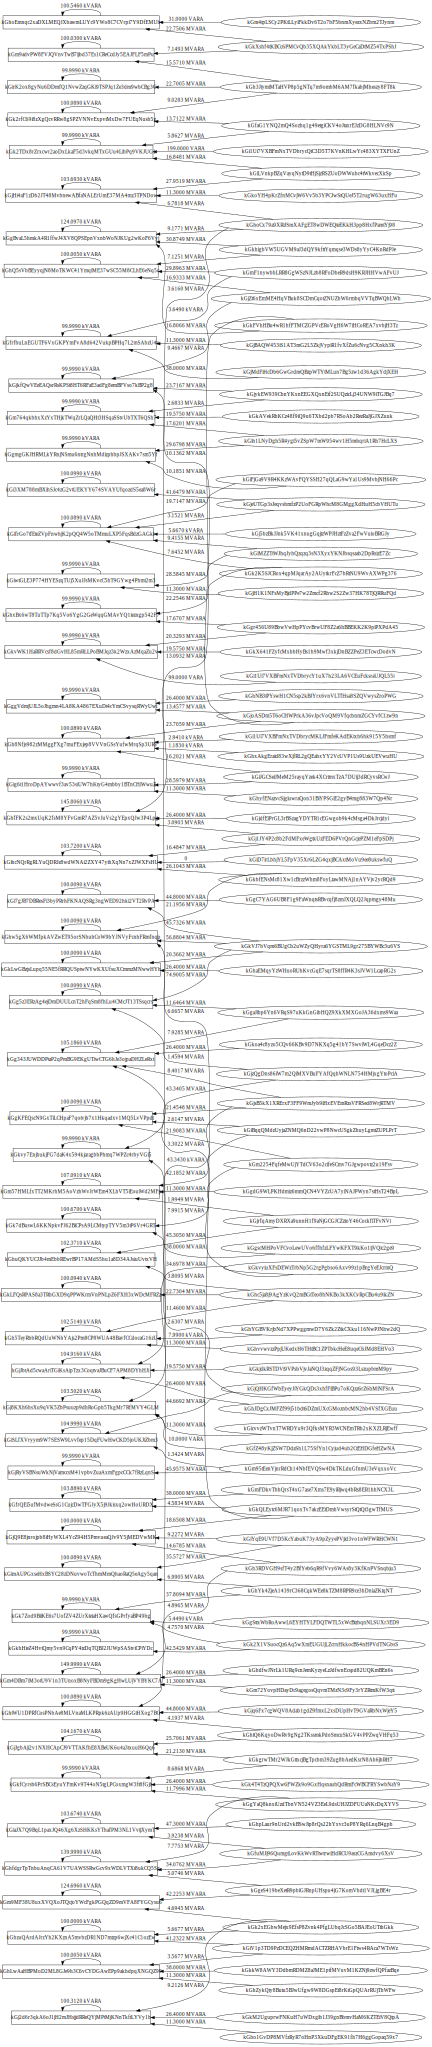

In [16]:
let img = await graphviz.dot(dotGraph, 'svg');
svg`${img}`

cross check validator count

In [17]:
data.length

53

In [18]:
(await api.query.staking.counterForValidators()).toHuman() // number of validators incl wannabes

"53"

cross check nominator count

In [19]:
(new Set(data.map((x)=>{
    return x.others.map((y)=>{
        return y.who
    })
}).flat())).size

81

In [20]:
(await api.query.staking.counterForNominators()).toHuman() // number of nominators incl wannabes

"82"

mismatch? no, actually the current active/total nominator is 81/82

TODO: how to get active nominators only?

cross check total stake

In [21]:
let totals = data.map((x)=>{
    return api.createType("Balance", x.total.replaceAll(",", ""))
})

In [22]:
totals.reduce((a,d)=>a.add(d))

{"code":-32000,"message":"Promise was collected"}:  

In [23]:
api.createType("Balance", totals.reduce((a,d)=>a.add(d))).toHuman()

{"code":-32000,"message":"Promise was collected"}:  

In [24]:
let era = await api.query.staking.currentEra()

In [25]:
era.toHuman()

"159"

In [26]:
let eraTotals = await api.query.staking.erasTotalStake(era.unwrap())

In [27]:
eraTotals

<BN: 80d047b4f3b2a2a502>

In [28]:
varaBalance(eraTotals.toHuman())

"2.3761 BVARA"

check for each validator that `total = own + sum(others)`

In [29]:
info.info.map(({exposure})=>{
    // console.log()
    let all = [exposure.own, ...(
        exposure.others.map(
            ({value})=>{
                // console.log(value.toHuman())
                return value
            }
        )
    )].reduce((a,d)=>api.createType("Balance",a).add(api.createType("Balance",d)))
    // console.log(all.toString(),exposure.total.toString())
    return api.createType("Balance",all).eq(api.createType("Balance",exposure.total))
})

[
  true, true, true, true, true, true, true,
  true, true, true, true, true, true, true,
  true, true, true, true, true, true, true,
  true, true, true, true, true, true, true,
  true, true, true, true, true, true, true,
  true, true, true, true, true, true, true,
  true, true, true, true, true, true, true,
  true, true, true, true
]

## Export Sankey Graph Data

https://sankey.csaladen.es/

Example output:

```
{
  sankey: {
    nodes: [
      { name: "Oil" },
      { name: "Natural Gas" },
      { name: "Coal", fill: "seaGreen" },
      { name: "Fossil Fuels", value: 65, layer: 2 },
      { name: "Electricity", layer: 2 },
      { name: "Energy", fill: "grey" }
    ],
    links: [
      { source: 0, target: 3, value: 15, fill: "blue" },
      { source: 1, target: 3, value: 20.344 },
      { source: 2, target: 3, value: 28.5 },
      { source: 2, target: 4, value: 2.5 },
      { source: 3, target: 5, value: 6 },
      { source: 4, target: 5, value: 2.5 },
      { source: 4, target: 4, value: 5 }
    ]
  },
  params: [ 0.5, 0.25, 0, 0, 0 ]
}
```

In [37]:
data.map((x)=>{
    return toMUnit(x.own)
})

[
  0.10054637287595797, 0.10000000009999999,   0.999999999999999,
  0.10008999999999957, 0.10008999999999957, 0.10000999999999999,
    0.999999999999999, 0.12469637343978662,   0.999999999999999,
  0.10369377204536968, 0.10000999999999999, 0.10491609163870518,
    0.999999999999999, 0.10237199999999956,   0.999999999999999,
  0.10009499999999961, 0.10518606108721838, 0.10709199999999963,
  0.10350223998516853,   0.999999999999999, 0.10008999999999957,
  0.10003027156840531,   0.999999999999999,   0.999999999999999,
  0.13999999999999985, 0.10367492682677606, 0.10372054220505837,
    0.999999999999999, 0.10000999999999999,   0.999999999999999,
  0.10416782613270716, 0.10008999999999957,  0.1240978235760687,
    0.999999999999999,   0.999999999999999, 0.10031232247188812,
  0.10000570991502539, 0.10008999999999957,   0.999999999999999,
    0.999999999999999, 0.10000000009999999, 0.14580615450950665,
  0.10388999999999951, 0.10067031260020416, 0.14999999999999986,
    0.999999999999999, 

### generate nodes

In [44]:
let validators = data.map(({validator})=>validator)

In [45]:
let nominators = [...(new Set(data.map((x)=>{
    return x.others.map((y)=>{
        return y.who
    })
}).flat()))]

In [48]:
validators.length

53

In [49]:
nominators.length

81

In [55]:
let nodes = [
    ...nominators.map((x)=>({name: x})),
    ...validators.map((x)=>({name: x, layer: 2})),
    {name: "Total"}
]

In [65]:
let nodeIndex = Object.fromEntries(nodes.map((n, i)=>{
    return [n.name, i]
}))

### generate links

In [71]:
let links = data.map((x)=>{
    let others = x.others.map((y)=>{
        return {
            source: y.who,
            target: x.validator,
            value: toMUnit(y.value),
        }
    })
    let own = {
        source: x.validator,
        target: x.validator,
        value: toMUnit(x.own),
    }
    let total = {
        source: x.validator,
        target: "Total",
        value: toMUnit(x.total),
    }
    return [total, own, ...others]
}).flat().map((x)=>{
    return {
        source: nodeIndex[x.source],
        target: nodeIndex[x.target],
        value: x.value,
    }
})

In [ ]:
console.log(JSON.stringify({sankey: {nodes, links}}, null, '  '))

load the json output into https://sankey.csaladen.es/ and generate an interactive sankey graph

![sankey graph](./sankey.png)